In [1]:
import os
import shutil
import random
import numpy as np
from io import BytesIO
from PIL import Image
import requests
import urllib
from IPython.display import display


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow import keras
import tensorflow.lite as tflite

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/home/ibai/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-12-15 12:37:13.037657: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-15 12:37:13.586400: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-15 12:37:13.586415: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on y

# EDA
## Data preparation and data cleaning

In [2]:
## dataset: https://www.tensorflow.org/datasets/catalog/eurosat#eurosatrgb_default_config


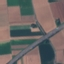

In [10]:
path = "EuroSAT_RGB/"
example = "Highway/Highway_15.jpg"
target_size = (64, 64)
img = load_img("{}{}".format(path,example), target_size=target_size)
img

In [13]:
x =  np.array(img)
x

array([[[163, 126, 118],
        [163, 126, 118],
        [164, 127, 119],
        ...,
        [110,  94,  97],
        [115,  96,  98],
        [115,  95,  97]],

       [[163, 126, 118],
        [163, 126, 118],
        [164, 127, 119],
        ...,
        [112,  93,  97],
        [116,  96,  98],
        [115,  95,  97]],

       [[162, 128, 118],
        [162, 128, 118],
        [165, 128, 119],
        ...,
        [111,  89,  92],
        [115,  92,  98],
        [114,  91,  97]],

       ...,

       [[170, 133, 125],
        [170, 133, 125],
        [170, 133, 127],
        ...,
        [127, 106, 105],
        [134, 110, 108],
        [140, 115, 111]],

       [[170, 133, 124],
        [170, 133, 124],
        [171, 134, 126],
        ...,
        [119, 105, 104],
        [129, 111, 109],
        [138, 119, 115]],

       [[172, 135, 126],
        [173, 136, 127],
        [172, 135, 127],
        ...,
        [101,  91,  90],
        [118, 103, 100],
        [128, 110, 106]]

## Split Dataset into Train/Val/Test (60%/20%/20%)

In [14]:
classes = ["AnnualCrop","Forest","HerbaceousVegetation","Highway","Industrial","Pasture","PermanentCrop","Residential","River","SeaLake"]

In [26]:
for class_ in classes:
    images = os.listdir(os.path.join(path, class_))
    print("Type of image: %20s: %d images on folder." % (class_, len(images)))

Type of image:           AnnualCrop: 3000 images on folder.
Type of image:               Forest: 3000 images on folder.
Type of image: HerbaceousVegetation: 3000 images on folder.
Type of image:              Highway: 2500 images on folder.
Type of image:           Industrial: 2500 images on folder.
Type of image:              Pasture: 2000 images on folder.
Type of image:        PermanentCrop: 2500 images on folder.
Type of image:          Residential: 3000 images on folder.
Type of image:                River: 2500 images on folder.
Type of image:              SeaLake: 3000 images on folder.


In [63]:
for folder in ['train', 'validation', 'test', 'fulltrain']:
    for class_ in classes:
        directory = os.path.join(folder, class_)
        if not os.path.exists(directory):
            os.makedirs(directory)
            print("{} created.".format(directory))

train/AnnualCrop created.
train/Forest created.
train/HerbaceousVegetation created.
train/Highway created.
train/Industrial created.
train/Pasture created.
train/PermanentCrop created.
train/Residential created.
train/River created.
train/SeaLake created.
validation/AnnualCrop created.
validation/Forest created.
validation/HerbaceousVegetation created.
validation/Highway created.
validation/Industrial created.
validation/Pasture created.
validation/PermanentCrop created.
validation/Residential created.
validation/River created.
validation/SeaLake created.
test/AnnualCrop created.
test/Forest created.
test/HerbaceousVegetation created.
test/Highway created.
test/Industrial created.
test/Pasture created.
test/PermanentCrop created.
test/Residential created.
test/River created.
test/SeaLake created.
fulltrain/AnnualCrop created.
fulltrain/Forest created.
fulltrain/HerbaceousVegetation created.
fulltrain/Highway created.
fulltrain/Industrial created.
fulltrain/Pasture created.
fulltrain/Pe

In [64]:
np.random.seed(1)
class_dict = {}
for class_ in classes:
    images = os.listdir(os.path.join(path, class_))
    for image in images:
        class_dict[image] = class_ 
        
    list_full_train, list_test = train_test_split(images, test_size=0.2, random_state=1)
    list_train, list_val = train_test_split(list_full_train, test_size=0.25, random_state=1)
    print (class_)
    print (len(list_train),len(list_test),len(list_val))
    for image in list_train:
        shutil.copyfile("{}/{}".format(os.path.join(path, class_),image),"train/{}/{}".format(class_,image))
    for image in list_full_train:
        shutil.copyfile("{}/{}".format(os.path.join(path, class_),image),"fulltrain/{}/{}".format(class_,image))
    for image in list_test:
        shutil.copyfile("{}/{}".format(os.path.join(path, class_),image),"test/{}/{}".format(class_,image))
    for image in list_val:
        shutil.copyfile("{}/{}".format(os.path.join(path, class_),image),"validation/{}/{}".format(class_,image))


AnnualCrop
1800 600 600
Forest
1800 600 600
HerbaceousVegetation
1800 600 600
Highway
1500 500 500
Industrial
1500 500 500
Pasture
1200 400 400
PermanentCrop
1500 500 500
Residential
1800 600 600
River
1500 500 500
SeaLake
1800 600 600


In [65]:
class_dict

{'AnnualCrop_733.jpg': 'AnnualCrop',
 'AnnualCrop_2243.jpg': 'AnnualCrop',
 'AnnualCrop_238.jpg': 'AnnualCrop',
 'AnnualCrop_694.jpg': 'AnnualCrop',
 'AnnualCrop_1959.jpg': 'AnnualCrop',
 'AnnualCrop_2502.jpg': 'AnnualCrop',
 'AnnualCrop_834.jpg': 'AnnualCrop',
 'AnnualCrop_1363.jpg': 'AnnualCrop',
 'AnnualCrop_1250.jpg': 'AnnualCrop',
 'AnnualCrop_2804.jpg': 'AnnualCrop',
 'AnnualCrop_381.jpg': 'AnnualCrop',
 'AnnualCrop_261.jpg': 'AnnualCrop',
 'AnnualCrop_1972.jpg': 'AnnualCrop',
 'AnnualCrop_2861.jpg': 'AnnualCrop',
 'AnnualCrop_294.jpg': 'AnnualCrop',
 'AnnualCrop_1128.jpg': 'AnnualCrop',
 'AnnualCrop_45.jpg': 'AnnualCrop',
 'AnnualCrop_111.jpg': 'AnnualCrop',
 'AnnualCrop_1160.jpg': 'AnnualCrop',
 'AnnualCrop_1866.jpg': 'AnnualCrop',
 'AnnualCrop_60.jpg': 'AnnualCrop',
 'AnnualCrop_356.jpg': 'AnnualCrop',
 'AnnualCrop_2185.jpg': 'AnnualCrop',
 'AnnualCrop_1855.jpg': 'AnnualCrop',
 'AnnualCrop_610.jpg': 'AnnualCrop',
 'AnnualCrop_795.jpg': 'AnnualCrop',
 'AnnualCrop_2980.jpg': 'An

In [105]:
def make_model(learning_rate=0.1):
    
    inputs = keras.Input(shape=(target_size[0], target_size[1], 3))
    
    conv = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
    
    pooling = keras.layers.MaxPool2D(strides=(2, 2))(conv)
    
    flatten = keras.layers.Flatten()(pooling)
    
    dense = keras.layers.Dense(64, activation='relu')(flatten)
    
    outputs = keras.layers.Dense(len(classes), activation='softmax')(dense)
    
    model = keras.Model(inputs, outputs)
    
    ##############################################
 
    # this changes the weights. There are many types of optimizers. Check also in cs231
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.8)
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate) 
    # optimizers use gradient descend
    #optimizers needs a way to know if it learns anything or not.
    
    loss = keras.losses.CategoricalCrossentropy(from_logits=False) 
    # logits False because we have softmax in the output
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

initial_model = make_model(learning_rate=0.002)

In [119]:
initial_model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 30752)             0         
                                                                 
 dense_25 (Dense)            (None, 64)                1968192   
                                                                 
 dense_26 (Dense)            (None, 10)                650       
                                                          

In [87]:

train_datagenerator = ImageDataGenerator(rescale=1./255)

train_data = train_datagenerator.flow_from_directory(
    "train/",
    target_size=target_size,
    batch_size=20,
    shuffle=True
)
val_datagenerator = ImageDataGenerator(rescale=1./255)

val_data = val_datagenerator.flow_from_directory(
    "validation/",
    target_size=target_size,
    batch_size=20,
    shuffle=False # no need to shuffle for validation
)



Found 16200 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [88]:
X, y = next(train_data) # to get next batch
X.shape



(20, 64, 64, 3)

In [89]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [90]:
class_pred_dict = {v:k for k, v in train_data.class_indices.items()}


In [91]:
class_pred_dict

{0: 'AnnualCrop',
 1: 'Forest',
 2: 'HerbaceousVegetation',
 3: 'Highway',
 4: 'Industrial',
 5: 'Pasture',
 6: 'PermanentCrop',
 7: 'Residential',
 8: 'River',
 9: 'SeaLake'}

In [118]:
scores={}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    model = make_model(learning_rate=lr)
    history = initial_model.fit(
        train_data,
        #steps_per_epoch=100,
        epochs=20,
        validation_data=val_data,
        validation_steps=10,
        #workers=2560 # for GPU
    )
    scores[lr] = history.history
    
    print()
    print()


0.0001
Epoch 1/20
810/810 [==============================] - 11s 13ms/step - loss: 0.9237 - accuracy: 0.6694 - val_loss: 1.4093 - val_accuracy: 0.6000
Epoch 2/20
810/810 [==============================] - 11s 13ms/step - loss: 0.8601 - accuracy: 0.6896 - val_loss: 0.8484 - val_accuracy: 0.6900
Epoch 3/20
810/810 [==============================] - 11s 13ms/step - loss: 0.8158 - accuracy: 0.7070 - val_loss: 1.1282 - val_accuracy: 0.6500
Epoch 4/20
810/810 [==============================] - 11s 13ms/step - loss: 0.7680 - accuracy: 0.7223 - val_loss: 1.7477 - val_accuracy: 0.4300
Epoch 5/20
810/810 [==============================] - 11s 13ms/step - loss: 0.7351 - accuracy: 0.7312 - val_loss: 1.0023 - val_accuracy: 0.6750
Epoch 6/20
810/810 [==============================] - 11s 13ms/step - loss: 0.7011 - accuracy: 0.7480 - val_loss: 0.8620 - val_accuracy: 0.6800
Epoch 7/20
810/810 [==============================] - 11s 13ms/step - loss: 0.6638 - accuracy: 0.7596 - val_loss: 0.9428 - val_ac

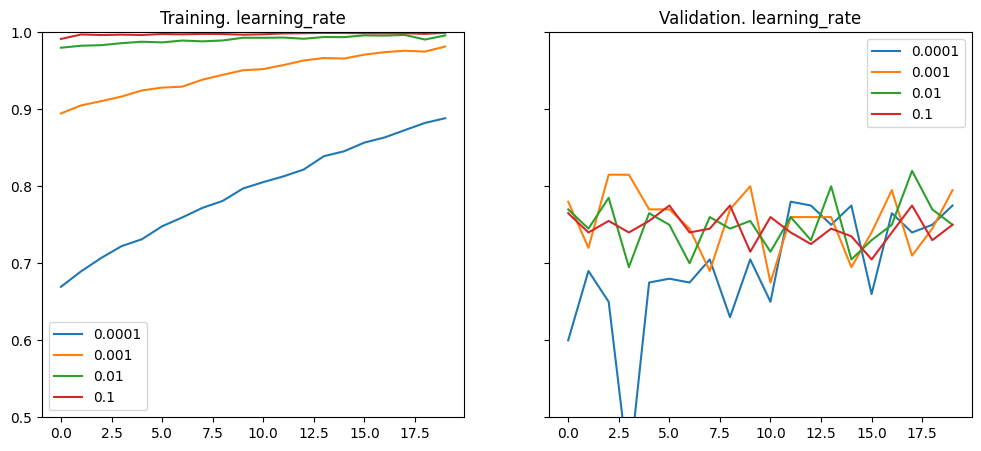

In [126]:
def plot_accuracy(scores,title):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5),sharey=True)
    for label, hist in scores.items():
        ax1.plot(hist['accuracy'], label=label)
        ax2.plot(hist['val_accuracy'], label=label)
    ax1.legend()
    ax2.legend()
    ax1.set_ylim([0.5,1])
    ax1.set_title("Training. {}".format(title))
    ax2.set_title("Validation. {}".format(title))


plot_accuracy(scores,"learning_rate")

# we can see that it is very close to 1 the training, while for validation not more than 80, which is overfitting.


In [131]:
def make_tunned_model(conv_layers=1,learning_rate=0.1, dropout_rate=0.2):
    
    inputs = keras.Input(shape=(target_size[0], target_size[1], 3))
    
    conv = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
    
    pooling = keras.layers.MaxPool2D(strides=(2, 2))(conv)
    
    for layer in range(conv_layers):
        conv = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(pooling)
        pooling = keras.layers.MaxPool2D(strides=(2, 2))(conv)
    
    flatten = keras.layers.Flatten()(pooling)
    
    dropout = keras.layers.Dropout(rate=dropout_rate)(flatten)
    
    dense = keras.layers.Dense(64, activation='relu')(dropout)    
    
    dense = keras.layers.Dense(64, activation='relu')(flatten)
    
    outputs = keras.layers.Dense(len(classes), activation='softmax')(dense)
    
    model = keras.Model(inputs, outputs)
    
    ##############################################
 

    optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.8)
    
    loss = keras.losses.CategoricalCrossentropy(from_logits=False)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model



In [133]:

scores={}

for dropout_rate in [0.1, 0.2, 0.3, 0.4, 0.5]:
    print(dropout_rate)
    model = make_tunned_model(dropout_rate=dropout_rate)
    history = initial_model.fit(
        train_data,
        epochs=10,
        validation_data=val_data,
        validation_steps=10,
    )
    scores[dropout_rate] = history.history
    
    print()
    print()

0.1
Epoch 1/10
810/810 [==============================] - 12s 15ms/step - loss: 0.0103 - accuracy: 0.9986 - val_loss: 1.3689 - val_accuracy: 0.7700
Epoch 2/10
810/810 [==============================] - 12s 15ms/step - loss: 0.0113 - accuracy: 0.9981 - val_loss: 1.8564 - val_accuracy: 0.7350
Epoch 3/10
810/810 [==============================] - 12s 15ms/step - loss: 0.0130 - accuracy: 0.9974 - val_loss: 1.4446 - val_accuracy: 0.7600
Epoch 4/10
810/810 [==============================] - 12s 15ms/step - loss: 0.0068 - accuracy: 0.9994 - val_loss: 1.5430 - val_accuracy: 0.7500
Epoch 5/10
810/810 [==============================] - 12s 15ms/step - loss: 0.0072 - accuracy: 0.9994 - val_loss: 1.5478 - val_accuracy: 0.7550
Epoch 6/10
810/810 [==============================] - 12s 15ms/step - loss: 0.0097 - accuracy: 0.9985 - val_loss: 1.4412 - val_accuracy: 0.7650
Epoch 7/10
810/810 [==============================] - 12s 15ms/step - loss: 0.0063 - accuracy: 0.9997 - val_loss: 1.7367 - val_accur

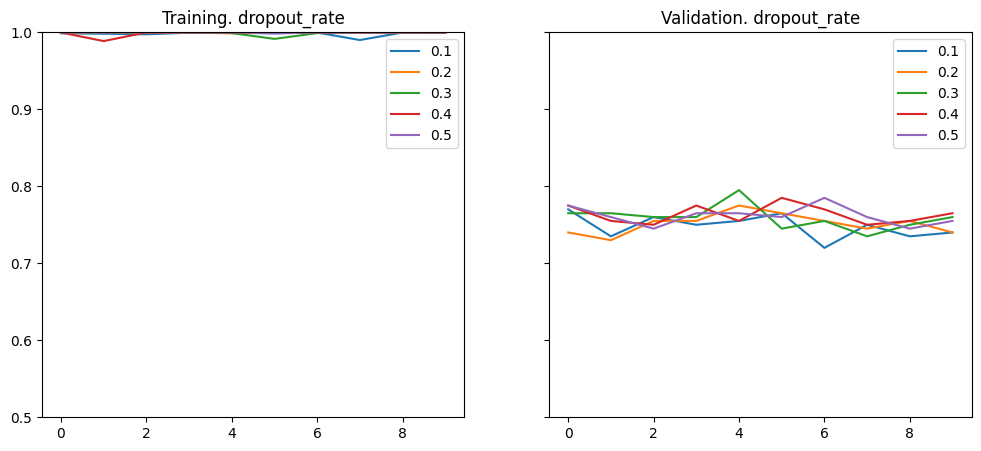

In [134]:
plot_accuracy(scores,"dropout_rate")

In [ ]:

print ("\n8.10: Data augmentation\n")

# this is another way for regularization. We generate more data from existing data. This also prevents from seeing the same image over and over again.
# Data augmentation is another way of achieving the same as droput

# We want to generate more images.
# we can take an image and flip it. Horizontally and vertically.
# we can also rotate different degrees
# also shiftting the image a little bit, left right up and down. So the height and the width also
# shear also, which is different to roration
# zooming the X, and/or the Y
# and many more

#all can be combined

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    #rotation_range=30,
    #width_shift_range=10.0,
    #height_shift_range=10.0,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True,
  )
# which augmentations should I choose? Use my own judgement
# we can also tune as a hyperparameter

# we do not apply augmentation to the validation ebcause we want to compare with something consistent always

train_ds = train_gen.flow_from_directory(
    './gdrive/MyDrive/clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
    )

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './gdrive/MyDrive/clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32, #for validation we do not need to shuffle
    shuffle=False
    )


In [135]:
#8.7: Checkpointing

In [ ]:
model.save_weights('model_v1.h5', save_format=('h5'))


In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True, #this is a variable that saves when it is the best compared to the past models
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
learning_rate = 0.001
model = make_model(learning_rate=learning_rate)
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint],
    workers=2560)


### TEST

In [123]:
test_datagenerator = ImageDataGenerator(rescale=1./255)

test_data = test_datagenerator.flow_from_directory(
    "test/",
    target_size=target_size,
    batch_size=20,
    shuffle=False # no need to shuffle for test
)


Found 5400 images belonging to 10 classes.


In [128]:
pred_test = initial_model.predict_generator(test_data)
predicted_class_indices_test = np.argmax(pred_test,axis=1)
predictions = [class_pred_dict[p] for p in predicted_class_indices_test]
cm = confusion_matrix([class_pred_dict[p] for p in predicted_class_indices_test], 
                 [class_pred_dict[l] for l in test_data.labels], 
                 labels=list(class_pred_dict.values()))
print(f'accuracy: {sum(predicted_class_indices_test == test_data.labels) / len(predicted_class_indices_test)}')


/tmp/ipykernel_36959/4055637446.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred_test = initial_model.predict_generator(test_data)


accuracy: 0.7537037037037037


[Text(0, 0.5, 'AnnualCrop'),
 Text(0, 1.5, 'Forest'),
 Text(0, 2.5, 'HerbaceousVegetation'),
 Text(0, 3.5, 'Highway'),
 Text(0, 4.5, 'Industrial'),
 Text(0, 5.5, 'Pasture'),
 Text(0, 6.5, 'PermanentCrop'),
 Text(0, 7.5, 'Residential'),
 Text(0, 8.5, 'River'),
 Text(0, 9.5, 'SeaLake')]

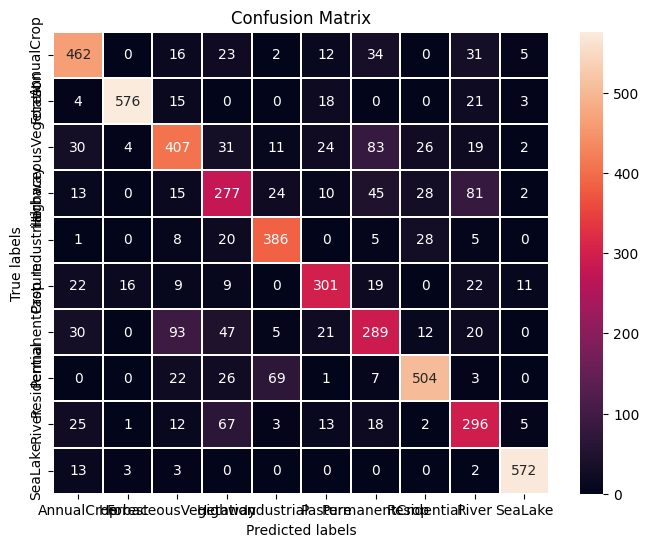

In [129]:
f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', ax=ax, linewidths=0.1)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(list(class_pred_dict.values()))
ax.yaxis.set_ticklabels(list(class_pred_dict.values()))

### Save model

In [ ]:
model_path = '../models/map-model-v1.tflite'

converter = tflite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open(model_path, 'wb') as f_out:
    f_out.write(tflite_model)

In [ ]:
Prediction on a single image by final model

from keras.preprocessing import image
img = image.load_img('/###.jpg',target_size=(224,224))
img
labels = dict((v,k) for k,v in labels.items()) #class labels
X = np.array(img,dtype='float32')
X = X/255
X = np.expand_dims(X, axis=0)
print('predicted image is',labels[mobilenet_v2.predict([X]).argmax()])
mobilenet_v2.save('mobilenet_final') #save final model 
loaded_model = tf.keras.models.load_model('mobilenet_final') #load model 
print('predicted image is',labels[loaded_model.predict([X]).argmax()]) #predict loaded model on map image


In [ ]:
Instructions and code of the work carried out 
I first created a notebook called notebook.ipynb where I downloaded the data, explored, prepared the data, cleaned, run different models with different parameters, evaluated them and concluded which was the model that performed the best.
Then I generated the train.py script that trains the models and saves the model to a file with pickle, the predict.py file that loads the model and serves it and the test.py script that will be used to predict a specific day.
Then I created and environment and installed the libraries I will be using: pipenv install numpy scikit-learn flask gunicorn xgboost
Then I run the environment with: pipenv shell
I run a server locally: gunicorn --bind 0.0.0.0:9696 predict:app
I test that the model is working with: python3 test.py
After checking that it works, I create a docker container sudo docker build -t midterm_project .. We can test it running the docker image docker run -it --rm  midterm_project and executing python3 test.py
Finally I deploy it to AWS with Elastic Beanstalk. For that I first install the library pipenv install awsebcli --dev, initialize EB eb init -p docker -r eu-north-1 midterm_project and create the service eb create midterm-project-env
Now we just need to test it. For that, I modified the line pointing to the url in test.py and run python3 test.py. (There is no need to change it now since the server is still running in AWS (today being 5 November 2023))

In [ ]:
## ## ## ## ## ## Steps from: https://github.com/batxes/MLzoomcamp/blob/main/10-kubernetes/10-kubernetes.py
## ## ## ## ## ## Steps

#Once we have the model:

#we can Load it and have a look:

import tensorflow as tf
from tensorflow import keras
model = keras.models.load_model('./clothing-model-v4.h5')
tf.saved_model.save(model, 'clothing_model')

# we can watch the clothing_model folder with tree

tree clothing_model

# we can also use to see what is inside recursively
ls -lhR clothing_model

# with this we can see what is inside the model
saved_model_cli show --dir clothing_model --all




In [ ]:
next pipenv

pip install pipenv
pipenv install
pipenv shell
python predict.py

[[source]]
url = "https://pypi.org/simple"
verify_ssl = true
name = "pypi"

[packages]
scikit-learn = "==1.0"
flask = "*"
gunicorn = "*"
tensorflow = "*"
pillow = "*"

[dev-packages]

[requires]
python_version = "3.8"

In [ ]:
test locally.
We need to get script from notebook to load model
we also need to create python files like gateway, proto test and so on.
say also why we are using tensorflow lite

In [ ]:
create docker

FROM tensorflow/serving:2.7.0

COPY clothing_model /models/clothing-model/1
ENV MODEL_NAME="clothing-model"

In [ ]:
test docker locally
